In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Thomas\AppData\Local\Temp\ipykernel_7920\2530580355.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Configurations du style de graphique
sns.set(style="whitegrid")

# Chemin du dossier contenant les fichiers CSV
folder_path = "Save_Data"
output_folder = "Graphes"
os.makedirs(output_folder, exist_ok=True)

# Lister tous les fichiers CSV dans le dossier
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

In [3]:
# Initialiser des DataFrames pour accumuler les données
all_data = pd.DataFrame()

# Charger tous les fichiers CSV
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path)
    data['generation'] = file.replace('.csv', '')  # Ajouter une colonne génération
    all_data = pd.concat([all_data, data])

# Convertir la colonne génération en entier si nécessaire
all_data['generation'] = all_data['generation'].str.extract('(\d+)').astype(int)

# Trier les données par génération
all_data.sort_values(by='generation', inplace=True)

<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Thomas\AppData\Local\Temp\ipykernel_7920\2892503520.py:12: SyntaxWarning: invalid escape sequence '\d'
  all_data['generation'] = all_data['generation'].str.extract('(\d+)').astype(int)


In [4]:
# Fonction pour sauvegarder et afficher les graphiques
def save_and_show(fig, filename):
    fig.savefig(os.path.join(output_folder, filename), bbox_inches='tight')
    plt.show()

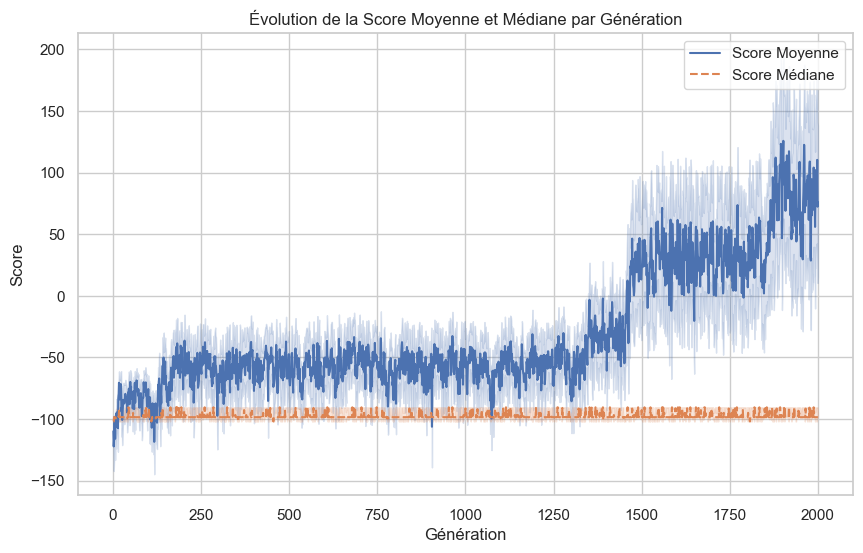

In [5]:
# Graphique 1 : Score moyen et médian par génération
plt.figure(figsize=(10, 6))
sns.lineplot(x='generation', y='Score', data=all_data, estimator='mean', label='Score Moyenne')
sns.lineplot(x='generation', y='Score', data=all_data, estimator='median', label='Score Médiane', linestyle='--')
plt.title('Évolution de la Score Moyenne et Médiane par Génération')
plt.xlabel('Génération')
plt.ylabel('Score')
plt.legend()
save_and_show(plt, "Score_moyenne_mediane.png")

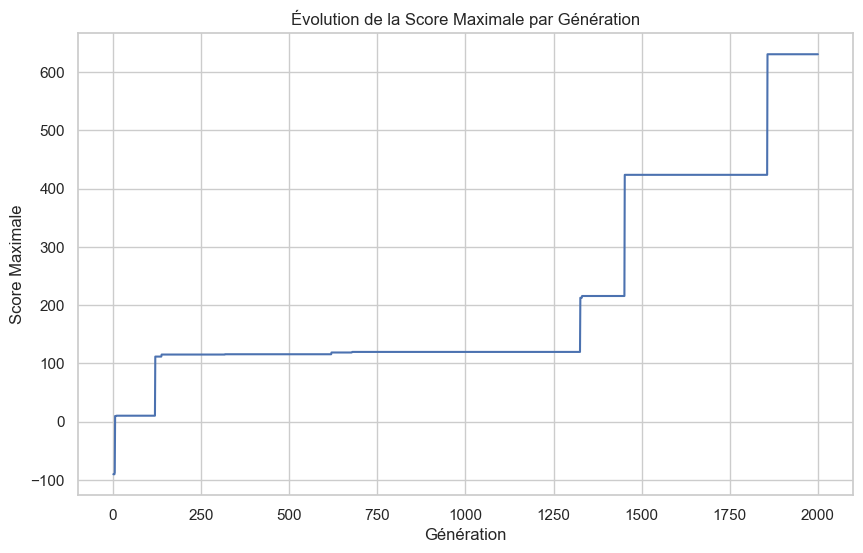

In [6]:
# Graphique 2 : Score maximale par génération
max_Score = all_data.groupby('generation')['Score'].max().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='generation', y='Score', data=max_Score)
plt.title('Évolution de la Score Maximale par Génération')
plt.xlabel('Génération')
plt.ylabel('Score Maximale')
save_and_show(plt, "Score_maximale.png")

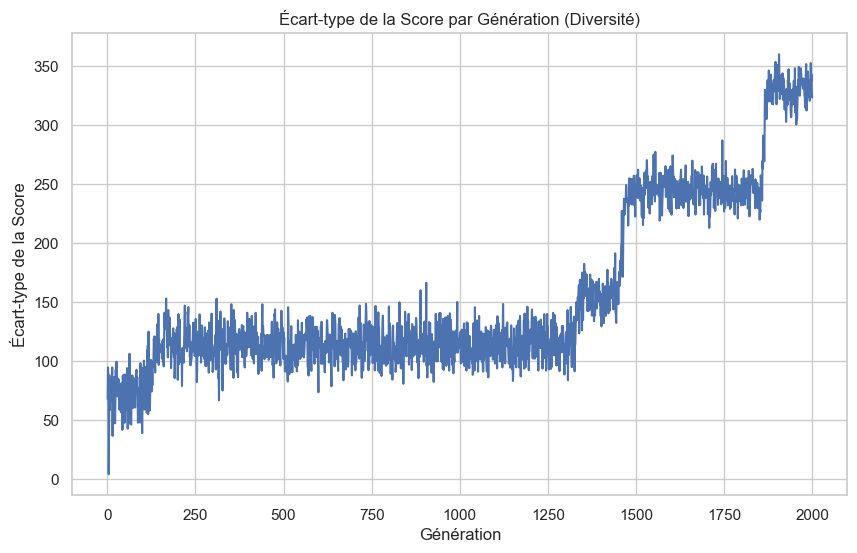

In [7]:
# Graphique 3 : Écart-type de la Score par génération
std_Score = all_data.groupby('generation')['Score'].std().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='generation', y='Score', data=std_Score)
plt.title('Écart-type de la Score par Génération (Diversité)')
plt.xlabel('Génération')
plt.ylabel('Écart-type de la Score')
save_and_show(plt, "Score_ecart_type.png")

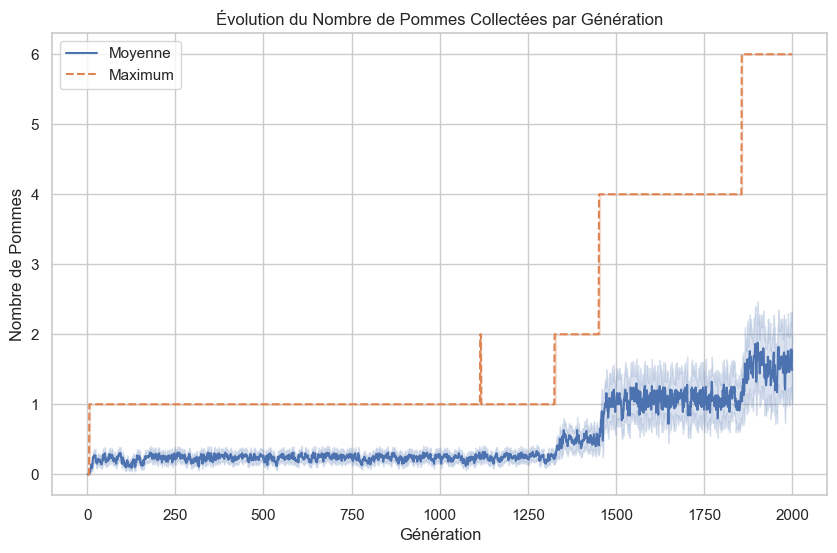

In [8]:
# Graphique 4 : Nombre moyen et maximal de pommes collectées par génération
plt.figure(figsize=(10, 6))
sns.lineplot(x='generation', y='NbPommes', data=all_data, estimator='mean', label='Moyenne')
sns.lineplot(x='generation', y='NbPommes', data=all_data, estimator='max', label='Maximum', linestyle='--')
plt.title('Évolution du Nombre de Pommes Collectées par Génération')
plt.xlabel('Génération')
plt.ylabel('Nombre de Pommes')
plt.legend()
save_and_show(plt, "pommes_collectees.png")

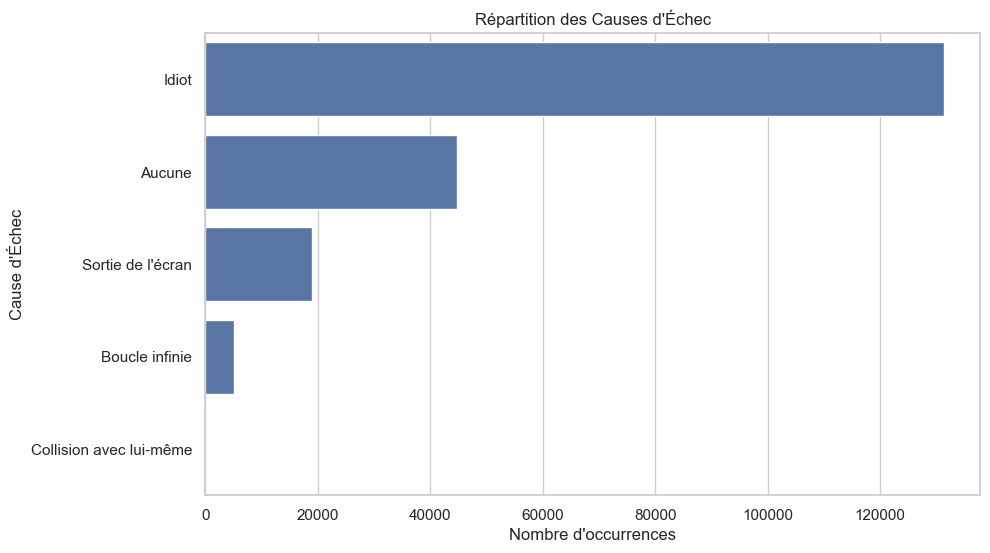

In [10]:
# Graphique 5 : Répartition des causes d'échec
plt.figure(figsize=(10, 6))
sns.countplot(y='Causes de Mort', data=all_data, order=all_data['Causes de Mort'].value_counts().index)
plt.title('Répartition des Causes d\'Échec')
plt.xlabel('Nombre d\'occurrences')
plt.ylabel('Cause d\'Échec')
save_and_show(plt, "causes_echec.png")